In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib as imp
import pickle
import Radar_drawn

In [ ]:
project_name = '' # # name of project, must be same as that used in previous files!
crestline_mask = np.loadtxt(f'{project_name}_crestline_mask.txt')
drawn_mask = np.loadtxt(f"{project_name}_drawn_mask.txt")
with open(f'{project_name}_boundary_information.pkl', 'rb') as f:
    boundary_information = pickle.load(f)
y_length = crestline_mask.shape[0]
x_length = crestline_mask.shape[1]
print(f"mask sizes: {x_length, y_length}")
boundary_information

In [3]:
irl_x_range = boundary_information['display x range'][1] - boundary_information['display x range'][0]
irl_y_range = boundary_information['display y range'][1] - boundary_information['display y range'][0]
# due to floating point precision errors, we use the ratio of the x-direction boundaries
def irl_to_pixel(irl_length : float):
    return int(irl_length * x_length / irl_x_range)

In [ ]:
"""Optional: clean picture of drawn centerlines"""
# f, ax = plt.subplots(figsize=(16, 16))
# ax.imshow(1 - drawn_mask, cmap='gray')

In [ ]:
"""Optional: clean picture of crest lines"""
# f, ax = plt.subplots(figsize=(16, 16))
# ax.imshow(1 - crestline_mask, cmap='gray')

In [ ]:
h = "#32a852"
def toRGB(h : str):
    return np.asarray(list(int(h.lstrip("#")[i:i+2], 16) for i in (0, 2, 4)))
toRGB(h)

In [ ]:
irl_radius = 0.9 # current: 1.1
pixel_radius = irl_to_pixel(irl_radius)
print(f"{irl_radius} in real life is {pixel_radius} in the picture")

0.9 in real life is 3 in the picture


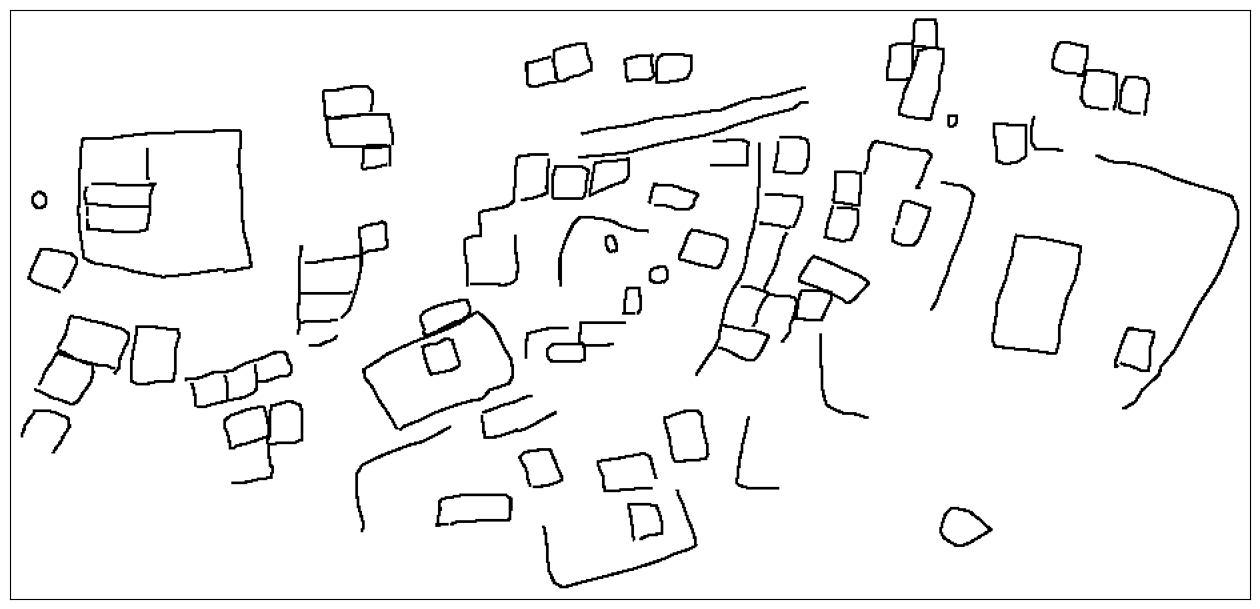

NOTE: dilated by 1 pixel to display more clearly


<Figure size 640x480 with 0 Axes>

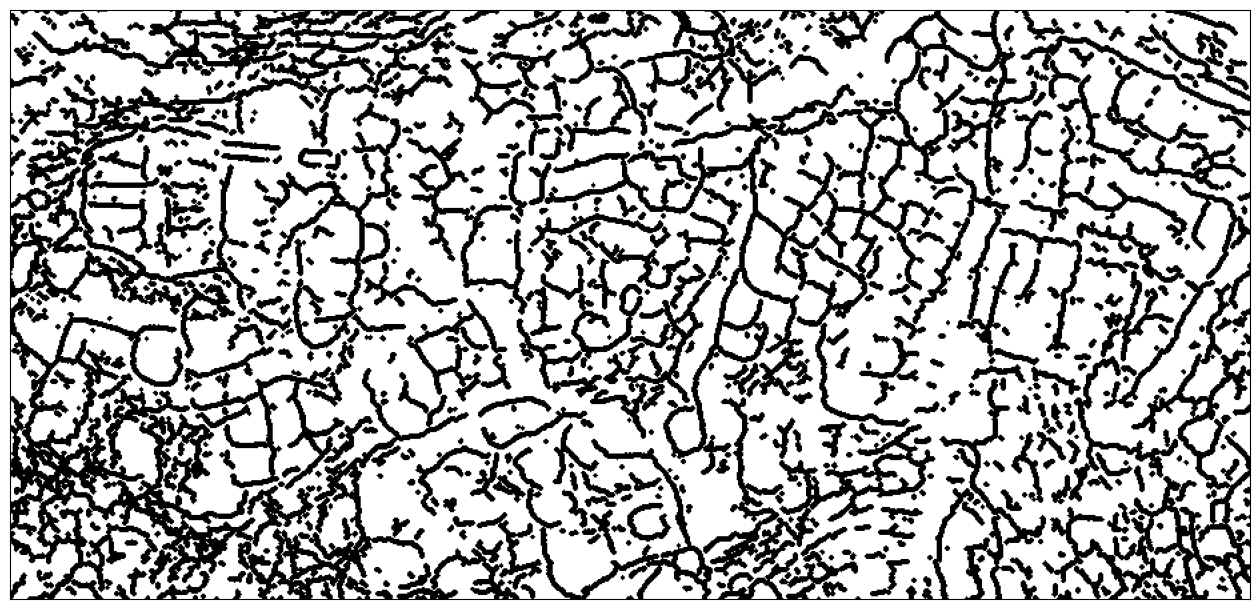

<Figure size 640x480 with 0 Axes>

In [13]:
"""Good Version"""
import os
# 1.4=6, 1.3=5, 1.1=4, 0.9=3
imp.reload(Radar_drawn)
irl_radius = 0.9
pixel_radius = irl_to_pixel(irl_radius)
# folder = f"irl={irl_radius}_px={pixel_radius}"
# os.mkdir(folder)
print(f"{irl_radius} in real life is {pixel_radius} in the picture")
comparer = Radar_drawn.Comparer(name=project_name, 
    mask_a=drawn_mask.astype(np.int64), 
    mask_b=crestline_mask.astype(np.int64),
    names={},
    background=None,
    result_filename=f'TGB_d=13_n=6_irl={irl_radius}_r={pixel_radius}px',
    dir="", # f"{folder}/",
    filetype='tiff',
    DPI=600
)
# _ = comparer.CM(
#     true_pos_color=np.asarray([0, 51, 102]), #toRGB("#2ab7ca"),
#     false_pos_color=np.asarray([255, 153, 0]), #toRGB("#fed766"),
#     false_neg_color=np.asarray([128, 128, 128]), #toRGB("#fe4a49"),
#     true_neg_color=np.asarray([50, 50, 50]),
#     background_color=toRGB("#ffffff"),
#     comparison_space=np.ones(shape=drawn_mask.shape, dtype=np.int64),
#     radius=pixel_radius,
#     save=True,
# )
# _ = comparer.detect_b_to_a(radius=pixel_radius, DPI=100)
# _ = comparer.detect_a_to_b(radius=pixel_radius, DPI=100)
_ = comparer.GPR_lines()
_ = comparer.crest_lines()

In [ ]:
import Radar_drawn
imp.reload(Radar_drawn)
irl_radius = 0.9 # current: 1.5
pixel_radius = irl_to_pixel(irl_radius)
print(f"{irl_radius} in real life is {pixel_radius} in the picture")
comparer = Radar_drawn.Compare_Paper_TGB(name=project_name, mask_a=drawn_mask, mask_b=crestline_mask,
    names={
        '1': '(a) hand-traced lines',
        '2': '(b) crest lines',
        '3': '(c) correlation map',
    },
    result_filename=f'TGB_figure_4_r={pixel_radius}'
) # fatten_mask_radius=irl_to_pixel(irl_radius_fatten)
comparer.statistics(show_other=False, save=True, radius=pixel_radius, figsize=(16, 16), DPI=400)